# Train WaveNet

In [1]:
from model import Optimizer, WaveNetData
from WaveNetModel2 import WaveNetModel2

import torch
import numpy as np
import time

from IPython.display import Audio
from IPython.core.debugger import Tracer
from matplotlib import pyplot as plt
from matplotlib import pylab as pl
from IPython import display

%matplotlib notebook

## Setup Model

In [2]:
train_sample = "train_samples/sapiens_11025.wav"
layers = 11
blocks = 3
classes = 128
dilation_channels = 32
residual_channels = 32
skip_channels = 64
kernel_size = 2

use_cuda = torch.cuda.is_available()

In [3]:
model = WaveNetModel2(layers=layers,
                      blocks=blocks,
                      dilation_channels=dilation_channels,
                      residual_channels=residual_channels,
                      skip_channels=skip_channels,
                      classes=classes)

if use_cuda:
    model.cuda()
    print("use cuda")

#print("model: ", model)
print("scope: ", model.scope)
print("parameter count: ", model.parameter_count())

data = WaveNetData(train_sample,
                   input_length=model.scope,
                   target_length=model.last_block_scope,
                   num_classes=model.classes,
                   cuda=use_cuda)

scope:  7165
parameter count:  177312


<IPython.core.display.Javascript object>


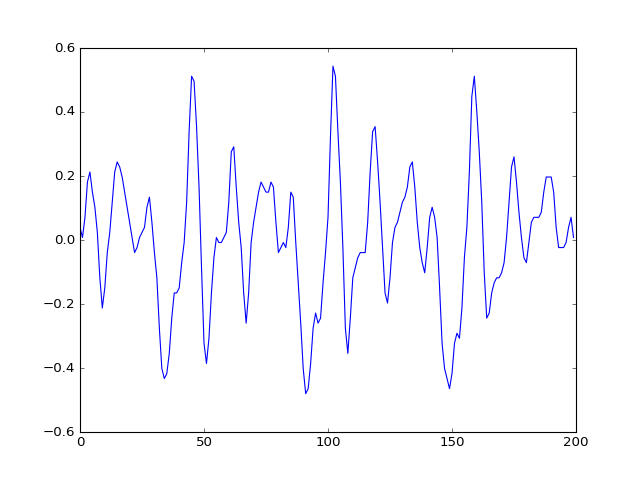

In [4]:
start_tensor = data.get_minibatch([model.scope])[0].squeeze()

plt.ion()
plt.plot(start_tensor[-200:].numpy())
plt.ioff()

## Train Model

In [5]:
learning_rate = 0.01
mini_batch_size = 4
avg_length = 4
epochs = 200

In [6]:
optimizer = Optimizer(model,
                      learning_rate=learning_rate,
                      stop_threshold=0.0,
                      avg_length=avg_length,
                      mini_batch_size=mini_batch_size)

def hook(losses):
    ax.clear()
    ax.plot(losses)
    fig.canvas.draw()
    
optimizer.hook = hook

<IPython.core.display.Javascript object>


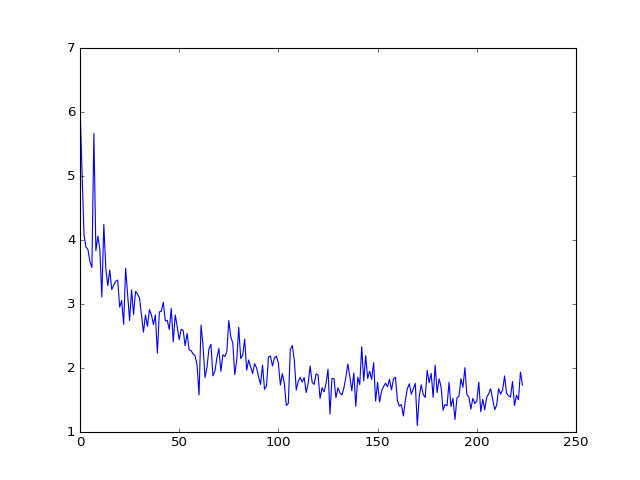

start training...
epoch  0
unexpected high loss:  12.805913925170898
at minibatch  [244250, 42522, 274970, 6682]  /  297674
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9
epoch  10
epoch  11
epoch  12


KeyboardInterrupt: 

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

print('start training...')
tic = time.time()
optimizer.train(data, epochs=epochs)
toc = time.time()
print('Training took {} seconds.'.format(toc-tic))

In [8]:
torch.save(model.state_dict(), "model_parameters/sapiens_11-3-128-32-32-64-2")